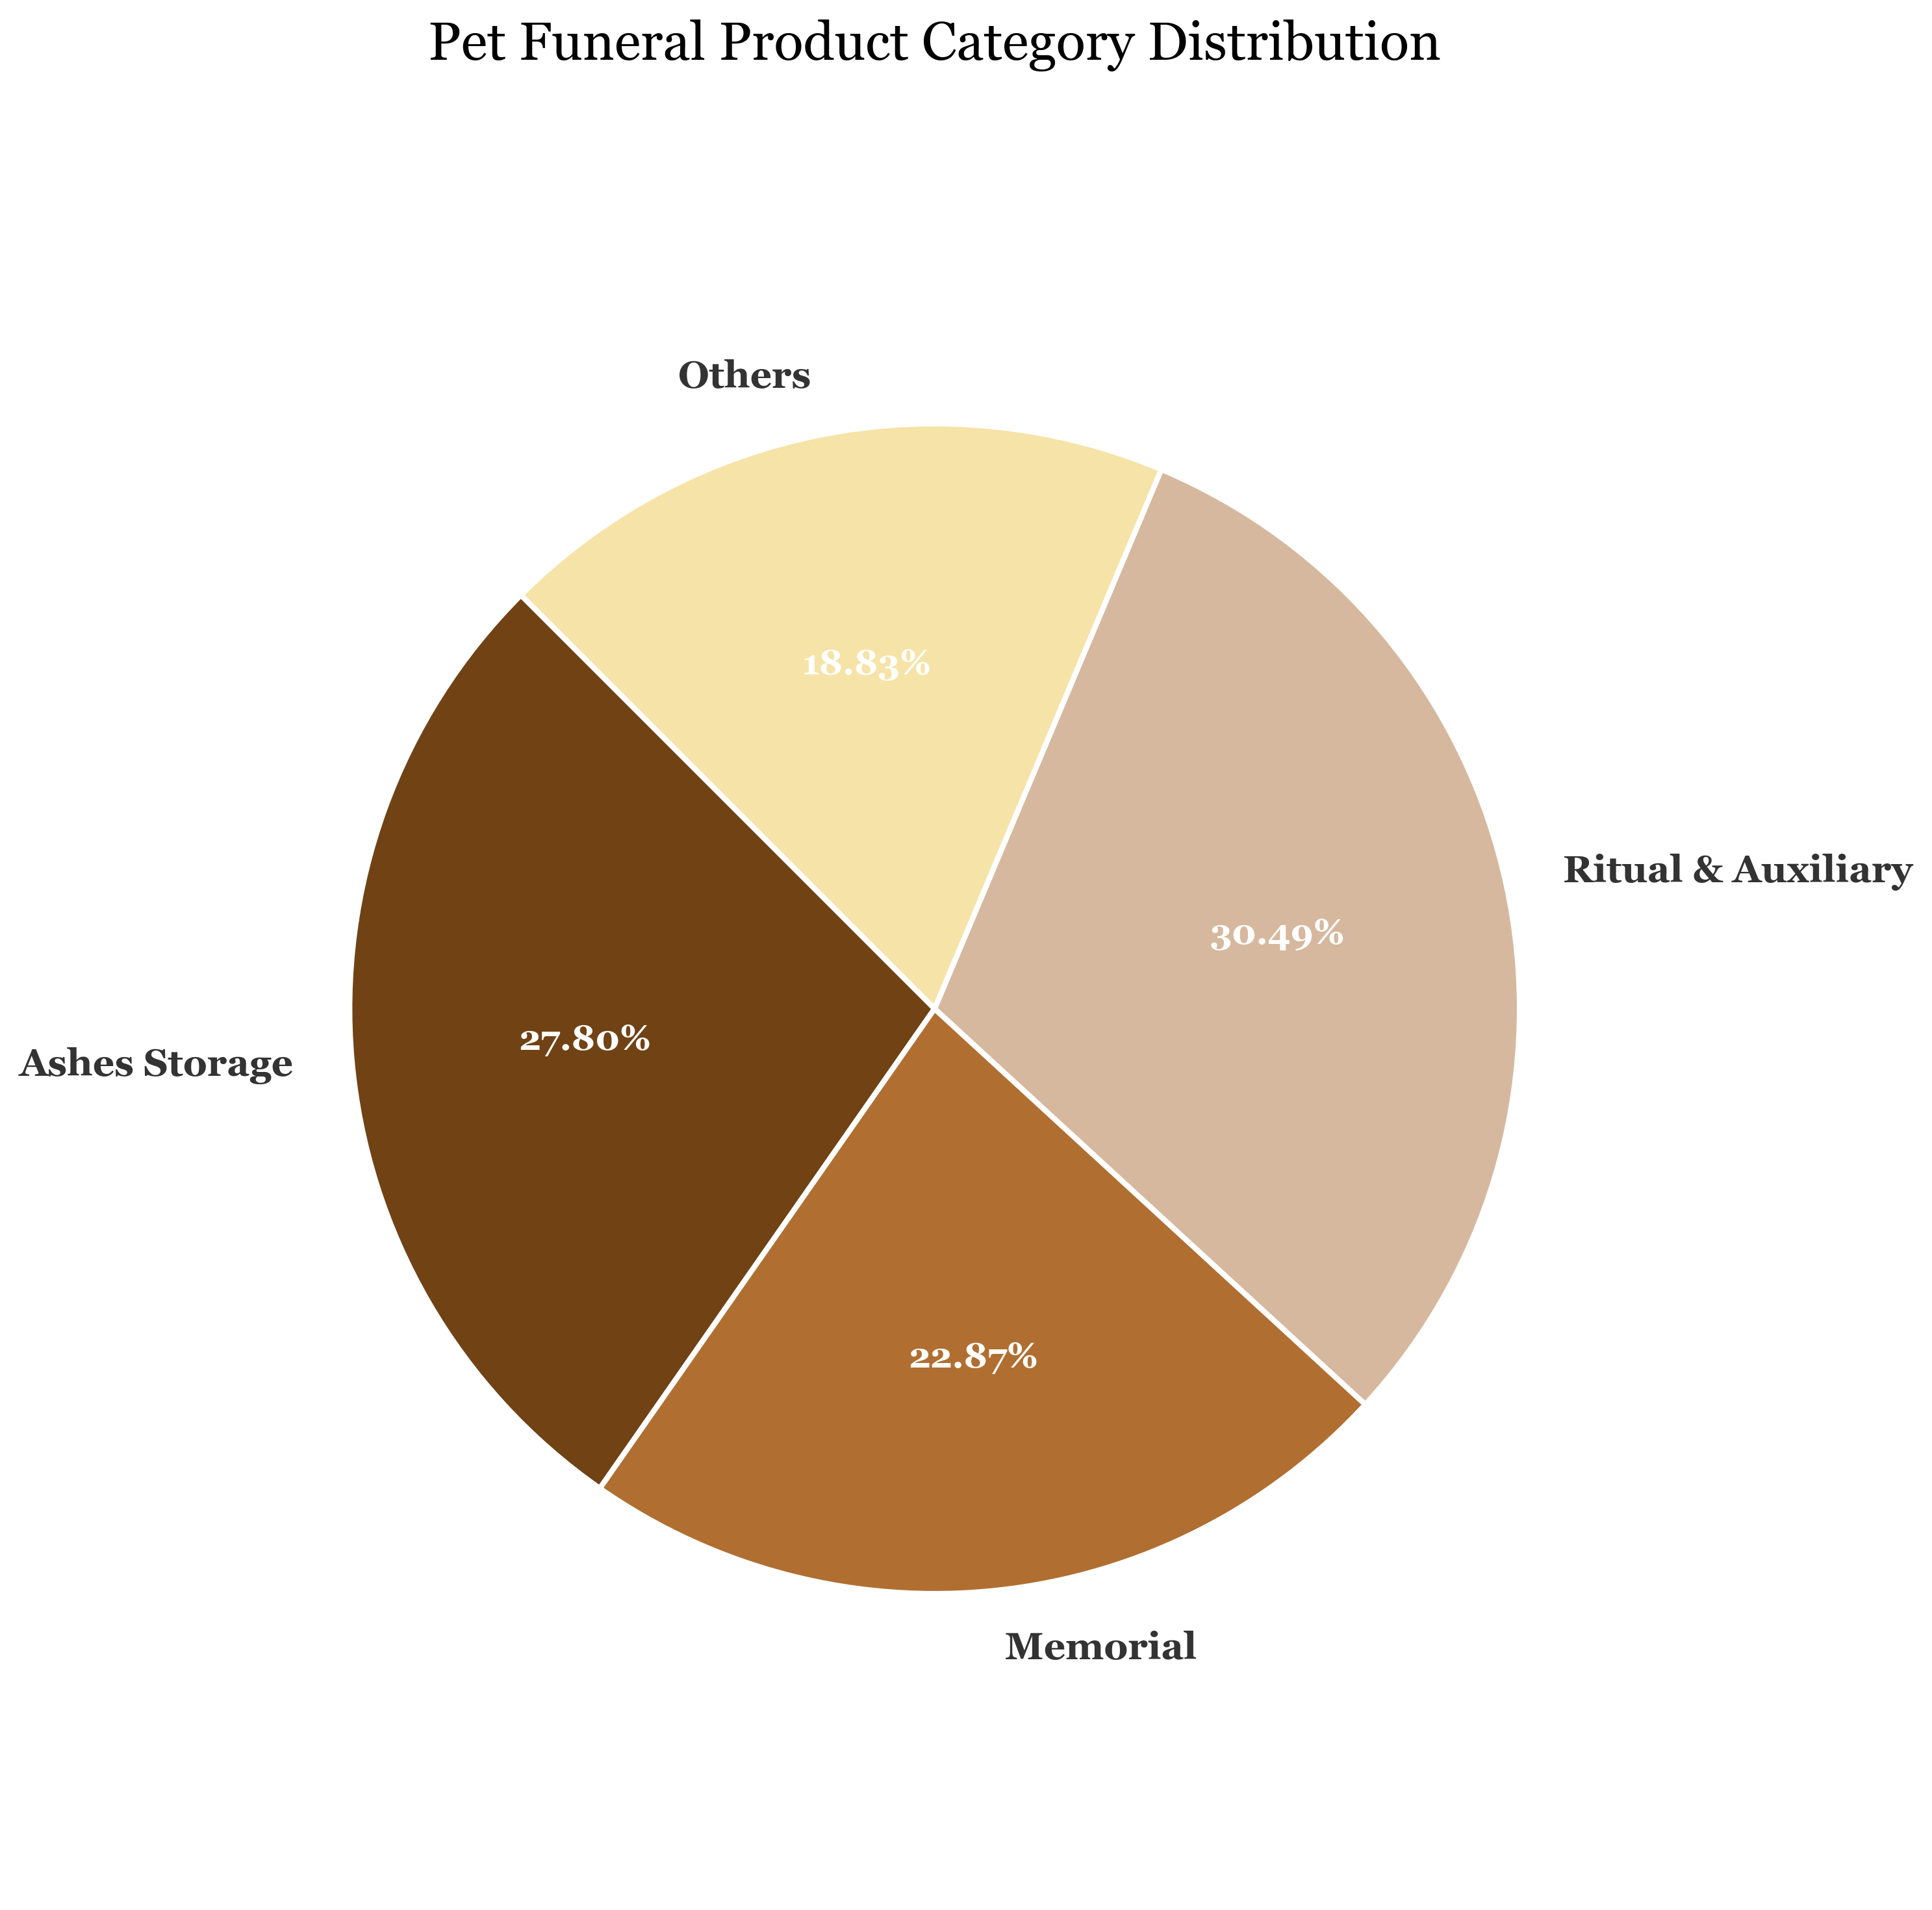

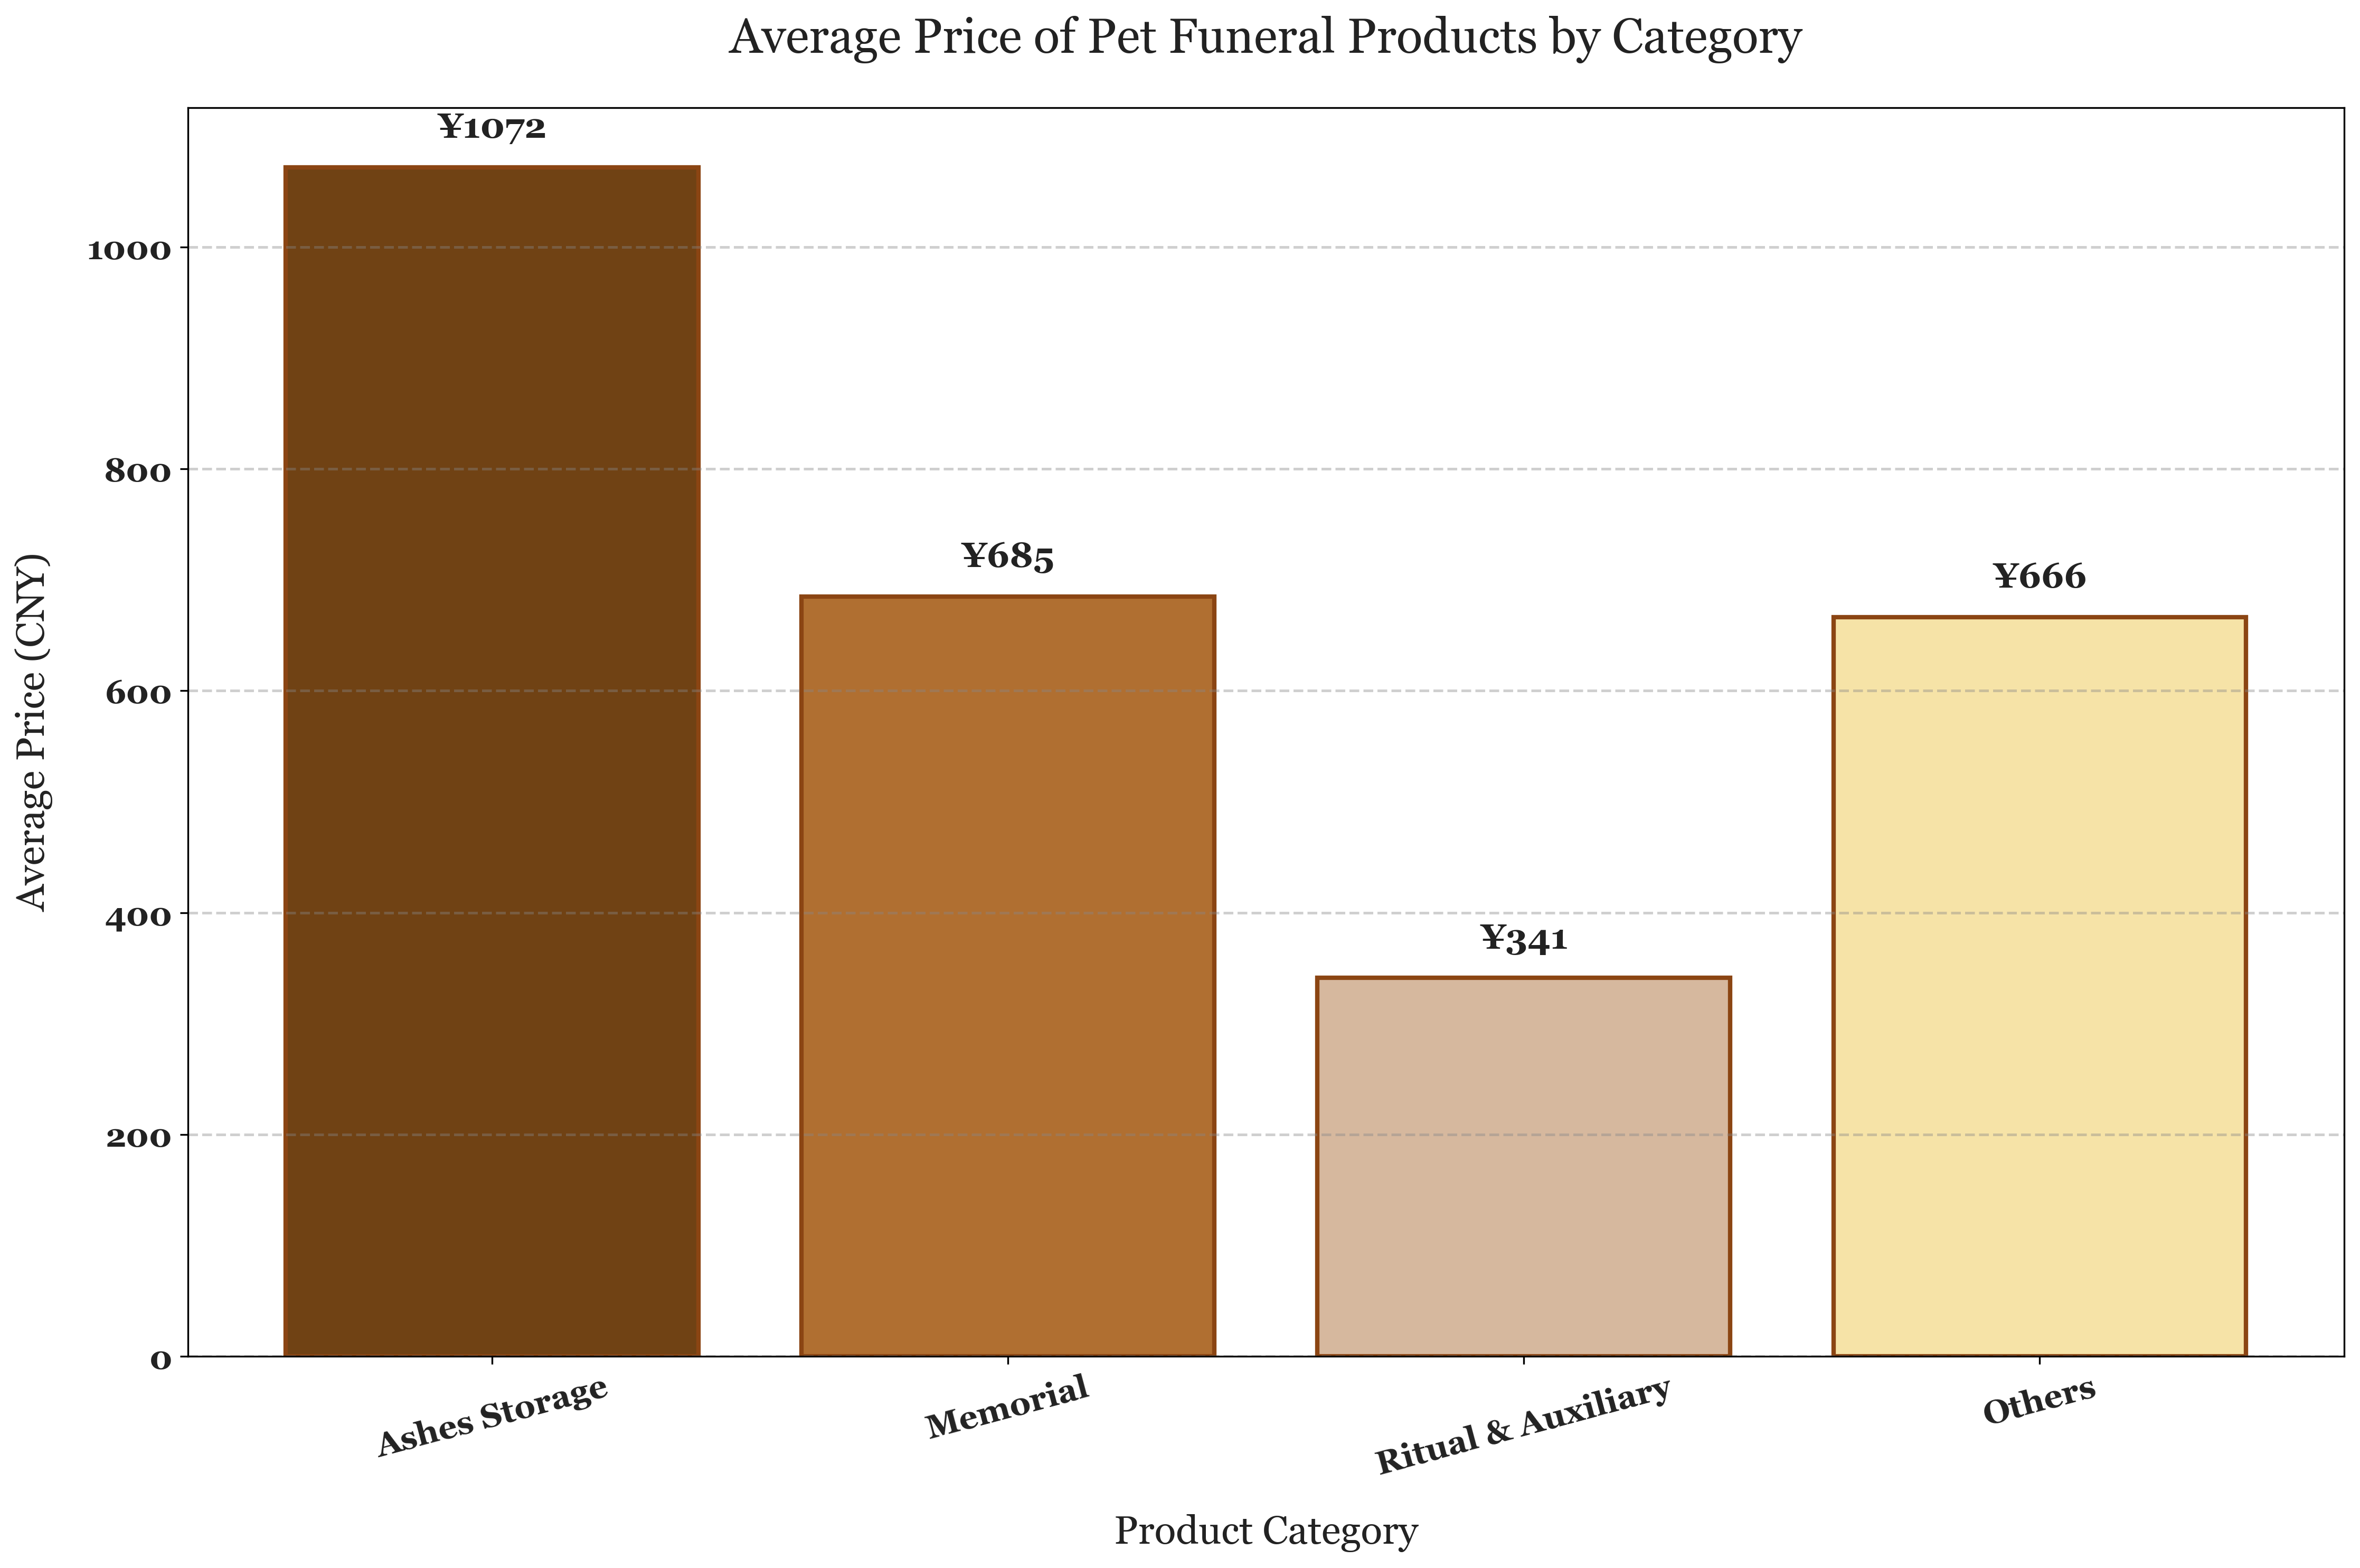

PET FUNERAL PRODUCT CATEGORY STATISTICS

[1] Category Distribution (Fixed Order):
                    Product Count  Percentage (%)
Category                                         
Ashes Storage                  62           27.80
Memorial                       51           22.87
Ritual & Auxiliary             68           30.49
Others                         42           18.83

[2] Average Price (CNY, Fixed Order):
                    Average Price (CNY)
Category                               
Ashes Storage                   1071.84
Memorial                         684.85
Ritual & Auxiliary               341.08
Others                           666.24


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据集（替换为你的文件路径）
df = pd.read_excel('dearpet_products_with_images.xlsx', sheet_name='宠物商品数据')

# 2. 核心分类函数（固定类别顺序，确保颜色对应）
def classify_pet_funeral(name):
    name = str(name).lower()
    if any(key in name for key in ["骨灰罐", "骨灰盒", "骨灰桶", "骨灰壇", "骨灰項鍊", "骨灰吊墜", "骨灰收納"]):
        return "Ashes Storage"
    elif any(key in name for key in ["紀念", "相框", "鑰匙圈", "水晶玻璃", "時光沙漏", "毛髮", "肖像", "紀念盒", "項鍊"]):
        return "Memorial"
    elif any(key in name for key in ["線香", "蠟燭", "銅磬", "香插", "防潮套", "祈念台", "鋪巾", "花瓶", "水碗", "碟子", "燈籠"]):
        return "Ritual & Auxiliary"
    else:
        return "Others"

# 3. 执行分类+台币转人民币（1 NT$=0.23 CNY）
df['Category'] = df['商品名称'].apply(classify_pet_funeral)
df['Price (CNY)'] = df['价格'].str.replace('NT$', '').str.replace(',', '').astype(float) * 0.23

# 4. 统计分类结果（按固定顺序排序，确保颜色对应）
fixed_category_order = ['Ashes Storage', 'Memorial', 'Ritual & Auxiliary', 'Others']
category_count = df['Category'].value_counts().reindex(fixed_category_order)
category_pct = (category_count / len(df)).round(4) * 100
category_avg_price = df.groupby('Category')['Price (CNY)'].mean().round(2).reindex(fixed_category_order)

# ========== 全局字体配置：粗重英文字体（Georgia Bold） ==========
plt.rcParams.update({
    'font.family': 'Georgia',          # 更具质感的英文字体（适合粗体显示）
    'font.weight': 'bold',             # 全局强制粗重字体（无细体）
    'font.style': 'normal',            # 无斜体，保持庄重
    'figure.dpi': 300,                 # 高清分辨率
    'axes.unicode_minus': False,       # 解决负号显示问题
})

# 固定配色（饼图+柱状图类别颜色严格对应）
colors = ['#704214', "#B06F31", '#D6B89E', "#F6E3A7"]  

# ========== 可视化1：分类数量占比饼图（保持协调，与柱状图风格统一） ==========
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    category_count,
    labels=category_count.index,
    autopct='%1.2f%%',
    startangle=135,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 14, 'color': '#333333'}  # 饼图标签粗体14号
)

# 饼图百分比标签（粗体13号，白色高对比）
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')

# 饼图标题（粗体20号，突出主题）
plt.title('Pet Funeral Product Category Distribution', fontsize=20, pad=25)
plt.axis('equal')
plt.tight_layout()
plt.savefig('pet_funeral_category_pie.png', bbox_inches='tight')
plt.show()

# ========== 可视化2：分类平均价格柱状图（重点放大所有文字，粗重风格） ==========
plt.figure(figsize=(15, 10))

# 1. 绘制柱状图（颜色与饼图对应，粗边框增强质感）
bars = plt.bar(
    category_avg_price.index,  # 固定类别顺序，颜色对应
    category_avg_price,
    color=colors,
    edgecolor='#8B4513',       # 深棕粗边框（2px）
    linewidth=2
)

# 2. 柱状图价格标签（粗体16号，最大号文字，确保醒目）
for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f'¥{height:.0f}',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 10),  # 增大间距，避免紧贴柱顶
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=16,     # 价格标签最大，突出数据
        color='#222222', # 深黑文字，最强对比度
        fontweight='bold'
    )

# 3. 坐标轴标签（粗体18号，比标题稍小，清晰引导）
plt.xlabel('Product Category', fontsize=18, labelpad=15, color='#222222')
plt.ylabel('Average Price (CNY)', fontsize=18, labelpad=15, color='#222222')

# 4. 图表标题（粗体22号，视觉最突出，统领图表）
plt.title('Average Price of Pet Funeral Products by Category', fontsize=22, pad=25, color='#222222')

# 5. 坐标轴刻度（粗体15号，比标签小一级，清晰易读）
plt.xticks(rotation=15, fontsize=15, color='#222222')
plt.yticks(fontsize=15, color='#222222')

# 6. 网格线（浅灰粗虚线，辅助读数且不抢焦点）
plt.grid(
    axis='y',
    alpha=0.4,          # 稍提高透明度，确保可见
    linestyle='--',
    linewidth=1.2,      # 粗一点的网格线，更清晰
    color='#888888'
)

plt.tight_layout()
plt.savefig('pet_funeral_price_bar.png', bbox_inches='tight')
plt.show()

# ========== 输出统计结果（粗体格式，与图表风格统一） ==========
print("="*60)
print("PET FUNERAL PRODUCT CATEGORY STATISTICS")
print("="*60)
print("\n[1] Category Distribution (Fixed Order):")
dist_df = pd.DataFrame({
    'Product Count': category_count,
    'Percentage (%)': category_pct
})
print(dist_df)

print("\n[2] Average Price (CNY, Fixed Order):")
price_df = pd.DataFrame({
    'Average Price (CNY)': category_avg_price
})
print(price_df)
print("="*60)

In [26]:
# ========== 追加：图表导出增强（不修改原有逻辑，仅优化导出体验） ==========
import os

# -------------------------- 1. 自定义PNG保存路径（可修改，默认保存在当前目录） --------------------------
# 若需保存到指定文件夹，示例：PIE_SAVE_PATH = "C:/PetFuneralCharts/pet_funeral_category_pie.png"
PIE_SAVE_PATH = "pet_funeral_category_pie.png"  # 饼图保存路径
BAR_SAVE_PATH = "pet_funeral_price_bar.png"    # 柱状图保存路径

# -------------------------- 2. 验证保存路径（确保文件夹存在，避免报错） --------------------------
def check_save_dir(path):
    """检查保存路径的文件夹是否存在，不存在则创建"""
    dir_path = os.path.dirname(path)
    if dir_path and not os.path.exists(dir_path):
        os.makedirs(dir_path)
        print(f"📂 自动创建保存文件夹：{dir_path}")

# 检查并创建文件夹（针对自定义路径）
check_save_dir(PIE_SAVE_PATH)
check_save_dir(BAR_SAVE_PATH)

# -------------------------- 3. 重新执行导出（确保与原图表配置一致，补充关闭逻辑） --------------------------
# 重新绘制并导出饼图（避免plt.show()后状态异常）
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    category_count,
    labels=category_count.index,
    autopct='%1.2f%%',
    startangle=135,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 14, 'color': '#333333'}
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')
plt.title('Pet Funeral Product Category Distribution', fontsize=20, pad=25)
plt.axis('equal')
plt.tight_layout()
plt.savefig(PIE_SAVE_PATH, bbox_inches='tight', dpi=300)  # 强制指定300dpi高清
plt.close()  # 关闭图表，释放内存
print(f"\n✅ 饼图已导出至：{os.path.abspath(PIE_SAVE_PATH)}")  # 显示绝对路径，方便查找

# 重新绘制并导出柱状图
plt.figure(figsize=(15, 10))
bars = plt.bar(
    category_avg_price.index,
    category_avg_price,
    color=colors,
    edgecolor='#8B4513',
    linewidth=2
)
for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f'¥{height:.0f}',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=16,
        color='#222222',
        fontweight='bold'
    )
plt.xlabel('Product Category', fontsize=18, labelpad=15, color='#222222')
plt.ylabel('Average Price (CNY)', fontsize=18, labelpad=15, color='#222222')
plt.title('Average Price of Pet Funeral Products by Category', fontsize=22, pad=25, color='#222222')
plt.xticks(rotation=15, fontsize=15, color='#222222')
plt.yticks(fontsize=15, color='#222222')
plt.grid(axis='y', alpha=0.4, linestyle='--', linewidth=1.2, color='#888888')
plt.tight_layout()
plt.savefig(BAR_SAVE_PATH, bbox_inches='tight', dpi=300)  # 强制指定300dpi高清
plt.close()
print(f"✅ 柱状图已导出至：{os.path.abspath(BAR_SAVE_PATH)}")

# -------------------------- 4. 导出结果汇总提示 --------------------------
print("\n" + "="*80)
print("🎉 所有图表导出完成！")
print(f"📊 导出文件清单：")
print(f"  1. 分类占比饼图：{os.path.abspath(PIE_SAVE_PATH)}")
print(f"  2. 平均价格柱状图：{os.path.abspath(BAR_SAVE_PATH)}")
print(f"💡 提示：若找不到文件，可直接复制上方路径到文件管理器打开")
print("="*80)


✅ 饼图已导出至：/Users/syx/Documents/python脚本/pet_funeral_category_pie.png
✅ 柱状图已导出至：/Users/syx/Documents/python脚本/pet_funeral_price_bar.png

🎉 所有图表导出完成！
📊 导出文件清单：
  1. 分类占比饼图：/Users/syx/Documents/python脚本/pet_funeral_category_pie.png
  2. 平均价格柱状图：/Users/syx/Documents/python脚本/pet_funeral_price_bar.png
💡 提示：若找不到文件，可直接复制上方路径到文件管理器打开
